In this project, We will use the Python library pandas to perform a comprehensive analysis of financial data from the prominent FAANG companies: Facebook, Apple, Amazon, Netflix, and Google. This analysis will cover critical metrics, including stock value, risk, and returns.

Key questions that will be addressed in this notebook include:

*  How has each stock's price changed over time?

*   What are the moving averages for these stocks, and what insights do they provide?
*   What is the average daily return for each stock?
*   What is the correlation between the daily returns of different FAANG stocks?
*   What is the correlation between the daily returns of different FAANG stocks?
*   How much financial risk is associated with investing in each of these stocks?
*   How can we make data-driven predictions on the future performance of FAANG stocks?
*   This project aims to provide a detailed exploration of these questions, offering insights into the historical performance and potential future trends of FAANG stocks.

In [78]:
from __future__ import division
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime
#Using yfinance to access Yahoo Historical Stocks
import yfinance as yf

I will be comparing the five "FAANG" companies to analyze their average stock prices and returns to ultimately perform a risk assessment of the stocks in the last 365 days.

In [79]:
stock_list = ['AAPL','GOOG','MSFT','AMZN','NFLX']

end = datetime.now()

#Start date set to 1 year back
start = datetime(end.year-1,end.month,end.day)

for stock in stock_list:
    globals()[stock] = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Here I've listed simple statistics regarding the stock price of Netflix in the previous year.

In [80]:
NFLX.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NFLX,NFLX,NFLX,NFLX,NFLX,NFLX
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,616.867955,616.867955,623.591857,609.553427,616.365020,3.667242e+06
std,87.879221,87.879221,88.318433,86.669815,87.496655,2.491693e+06
min,444.619995,444.619995,448.429993,442.600006,447.250000,1.354200e+06
25%,562.059998,562.059998,568.440002,555.739990,562.469971,2.500900e+06
50%,624.849976,624.849976,632.000000,617.239990,624.919983,3.068200e+06
75%,681.469971,681.469971,687.059998,673.080017,679.349976,3.916300e+06
max,834.942505,834.942505,836.989929,820.536804,822.140015,2.643280e+07


In [81]:
NFLX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-11-13 00:00:00+00:00 to 2024-11-13 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, NFLX)  253 non-null    float64
 1   (Close, NFLX)      253 non-null    float64
 2   (High, NFLX)       253 non-null    float64
 3   (Low, NFLX)        253 non-null    float64
 4   (Open, NFLX)       253 non-null    float64
 5   (Volume, NFLX)     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


## Change in Stock Price Over Time

<Axes: xlabel='Date'>

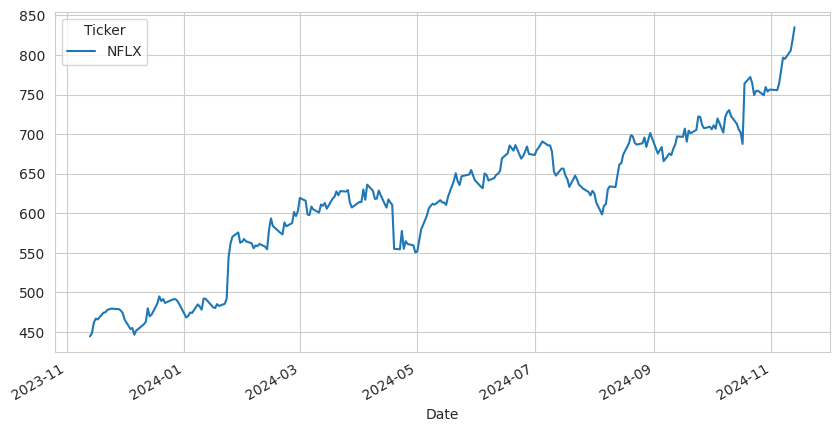

In [82]:
NFLX['Adj Close'].plot(legend = True, figsize = (10,5))

<Axes: xlabel='Date'>

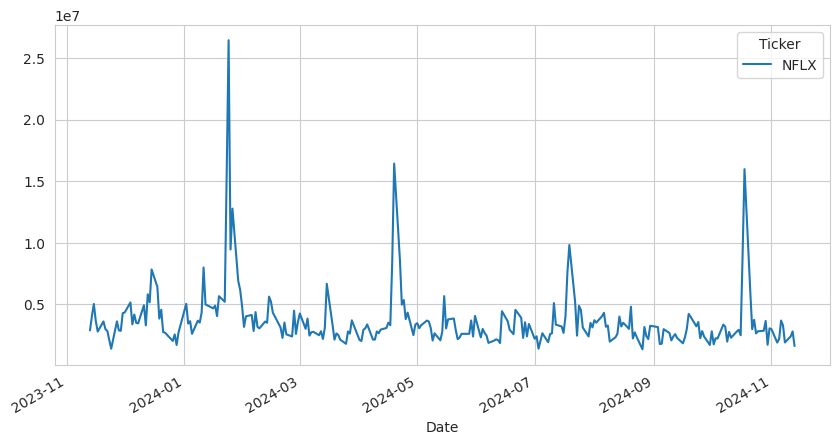

In [83]:
NFLX['Volume'].plot(legend = True, figsize = (10,5))

Following a strong first quarter, Netflix's stock price has fluctuated around $375, with trading volume decreasing to approximately 600,000 shares per day. To gain clearer insights into its price trends, let’s calculate various moving averages, which will help smooth out fluctuations in our data and reveal underlying trends more effectively.

## Calculating Moving Averages

In [84]:
averages = [10,25,50]
for avg in averages:
    label = "MAvg for %s days" %(str(avg))
    NFLX[label] = NFLX['Adj Close'].rolling(window = avg, center = False).mean()

In [85]:
NFLX.tail()

Price,Adj Close,Close,High,Low,Open,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days
Ticker,NFLX,NFLX,NFLX,NFLX,NFLX,NFLX,,,
Date,,,,,,,,,
2024-11-07 00:00:00+00:00,796.539978,796.539978,798.219971,779.940002,781.369995,3295100,762.527997,742.473596,719.498396
2024-11-08 00:00:00+00:00,795.039978,795.039978,799.059998,788.650024,797.359985,1910600,766.563995,745.487195,721.549596
2024-11-11 00:00:00+00:00,805.440002,805.440002,806.820007,795.570007,795.900024,2399200,772.195996,749.627996,723.631396
2024-11-12 00:00:00+00:00,819.500000,819.500000,820.369995,803.750000,807.500000,2809300,778.201996,753.537595,726.514996
2024-11-13 00:00:00+00:00,834.942505,834.942505,836.989929,820.536804,822.140015,1621047,786.322247,757.838096,729.620247


<Axes: xlabel='Date'>

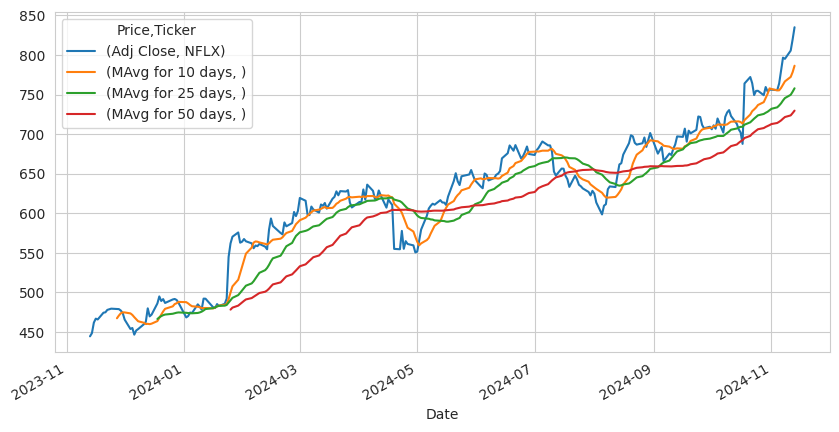

In [86]:
NFLX[['Adj Close', 'MAvg for 10 days', 'MAvg for 25 days', 'MAvg for 50 days']].plot(subplots = False, figsize = (10,5))

The 50-day moving average supports our observation that Netflix's stock has remained consistent at $365 for the past three months. This plot also reveals the approximate crossover points that tell us when Netflix's stock trend is increasing or decreasing. Now let's calculate the average daily returns for Netflix's stock.

## Daily Return Averages.


In [87]:
#The daily return column can be created by using the percentage change over the adjusted closing price
NFLX['Daily Return'] = NFLX['Adj Close'].pct_change()
NFLX.tail()

Price,Adj Close,Close,High,Low,Open,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days,Daily Return
Ticker,NFLX,NFLX,NFLX,NFLX,NFLX,NFLX,,,,
Date,,,,,,,,,,
2024-11-07 00:00:00+00:00,796.539978,796.539978,798.219971,779.940002,781.369995,3295100,762.527997,742.473596,719.498396,0.020930
2024-11-08 00:00:00+00:00,795.039978,795.039978,799.059998,788.650024,797.359985,1910600,766.563995,745.487195,721.549596,-0.001883
2024-11-11 00:00:00+00:00,805.440002,805.440002,806.820007,795.570007,795.900024,2399200,772.195996,749.627996,723.631396,0.013081
2024-11-12 00:00:00+00:00,819.500000,819.500000,820.369995,803.750000,807.500000,2809300,778.201996,753.537595,726.514996,0.017456
2024-11-13 00:00:00+00:00,834.942505,834.942505,836.989929,820.536804,822.140015,1621047,786.322247,757.838096,729.620247,0.018844


<Axes: xlabel='Date'>

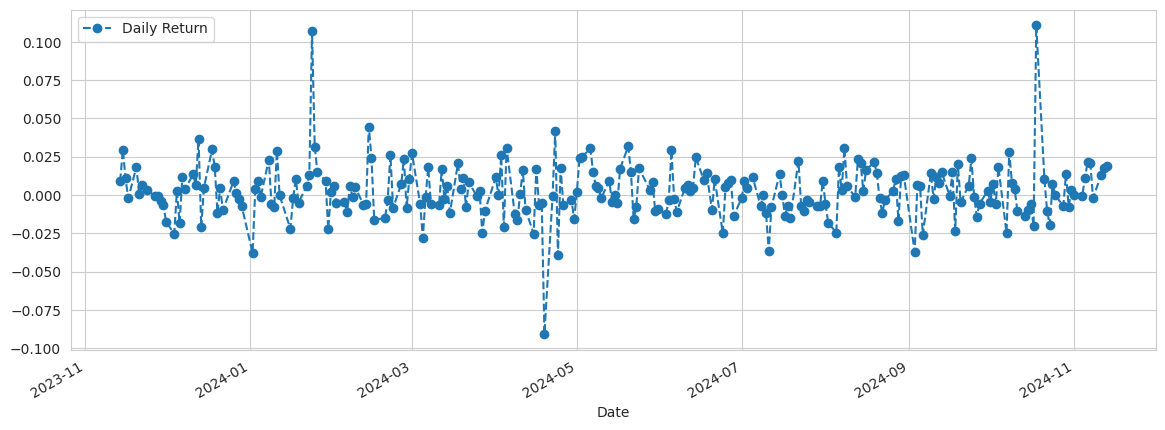

In [88]:
NFLX['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

<Axes: xlabel='Daily Return', ylabel='Count'>

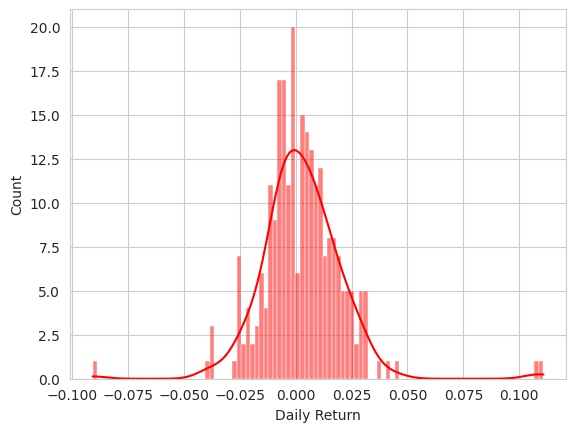

In [89]:
# sns.distplot(NFLX['Daily Return'].dropna(),bins=100,color='red')
sns.histplot(NFLX['Daily Return'].dropna(), bins=100, color='red', kde=True)


Using Seaborn to plot our axes, we find that the distribution of daily returns is concentrated heavily around 0 with little skew toward positive or negative returns.

## Correlation Between Different Daily Stock Returns

Now let's examine the trend between some pairs of the 'FAANG' stocks using Seaborn's joint plot feature, using the percent change of daily returns.

In [90]:
close_compr = yf.download(stock_list,start,end)['Adj Close']
rets_compr = close_compr.pct_change()
rets_compr.tail()

[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOG,MSFT,NFLX
Date,,,,,
2024-11-07 00:00:00+00:00,0.021372,0.014293,0.022150,0.012495,0.020930
2024-11-08 00:00:00+00:00,-0.001188,-0.008903,-0.013276,-0.006793,-0.001883
2024-11-11 00:00:00+00:00,-0.012029,-0.006437,0.011731,-0.010721,0.013081
2024-11-12 00:00:00+00:00,0.000000,0.010008,0.007419,0.012009,0.017456
2024-11-13 00:00:00+00:00,0.007894,0.023623,-0.011646,0.011299,0.018844


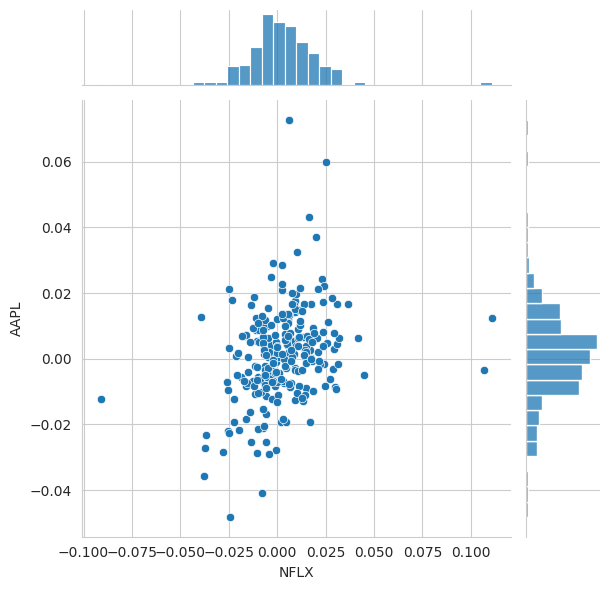

In [91]:
# sns.jointplot('NFLX','AAPL',rets_compr,kind='scatter')
sns.jointplot(x='NFLX', y='AAPL', data=rets_compr, kind='scatter')


There seems to be a moderate correlation between Netflix and Apple returns. I'll generate all of the pairwise plots to see if there are any stronger correlations.

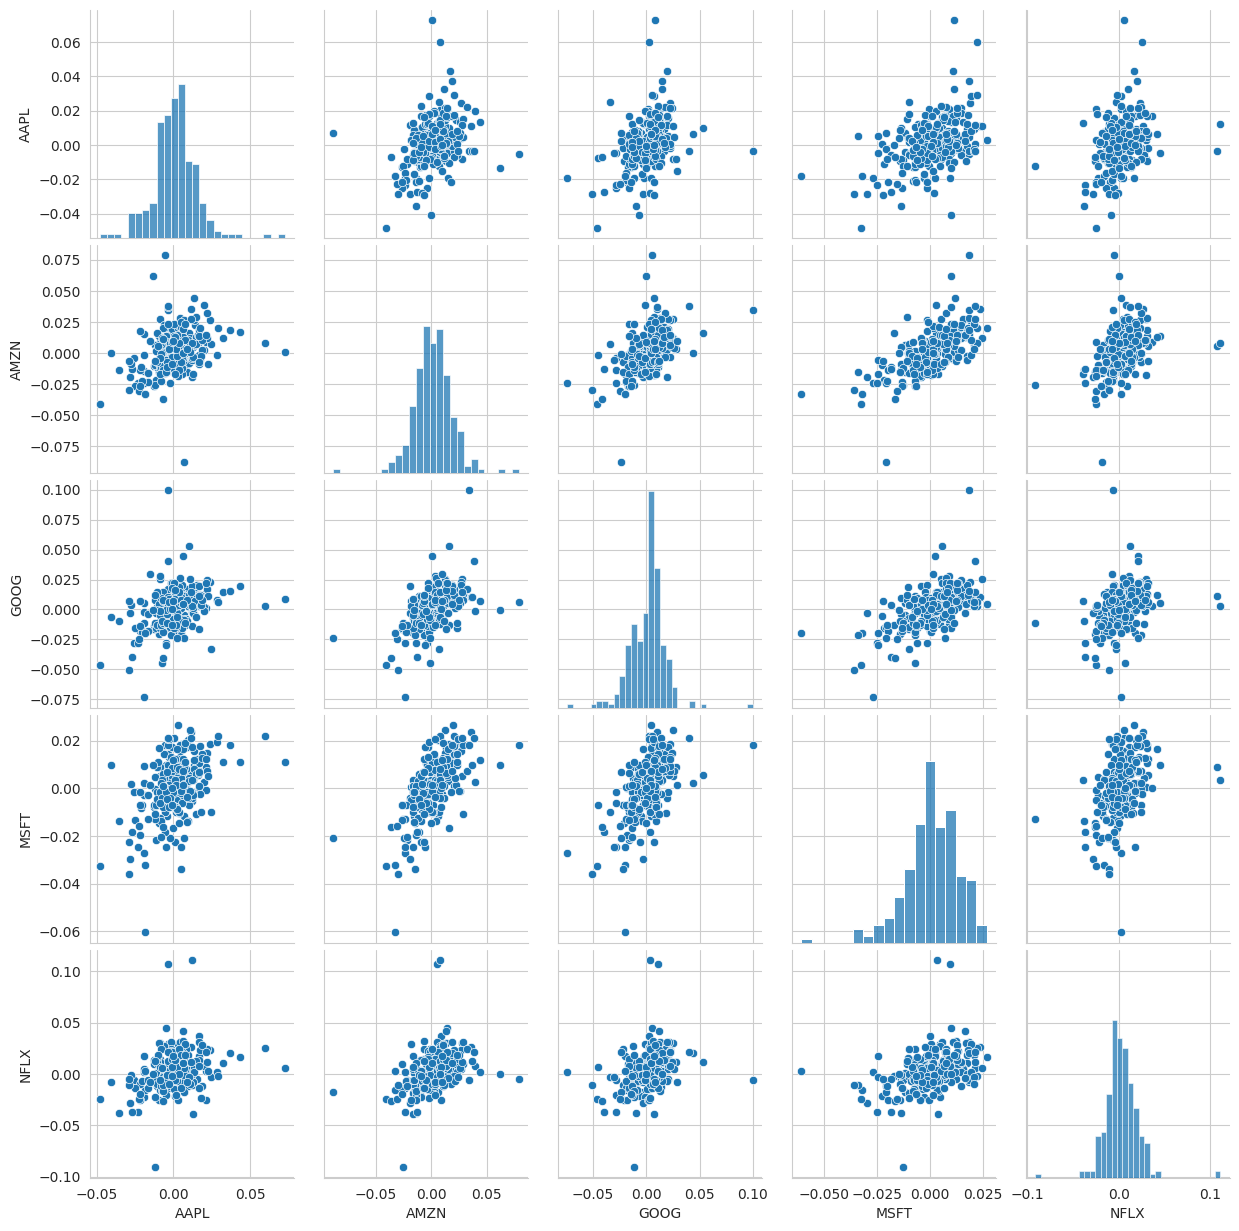

In [92]:
sns.pairplot(rets_compr.dropna())

There seems to be stronger correlations between Amazon and Microsoft, though to be sure we need another visualization tool. The correlation matrix plot, which allows us to view the pairwise confidence intervals together, is a great option for doing this.

Ticker      AAPL      AMZN      GOOG      MSFT      NFLX
Ticker                                                  
AAPL    1.000000  0.333727  0.368141  0.460558  0.307361
AMZN    0.333727  1.000000  0.509317  0.657001  0.392820
GOOG    0.368141  0.509317  1.000000  0.583131  0.316349
MSFT    0.460558  0.657001  0.583131  1.000000  0.420381
NFLX    0.307361  0.392820  0.316349  0.420381  1.000000


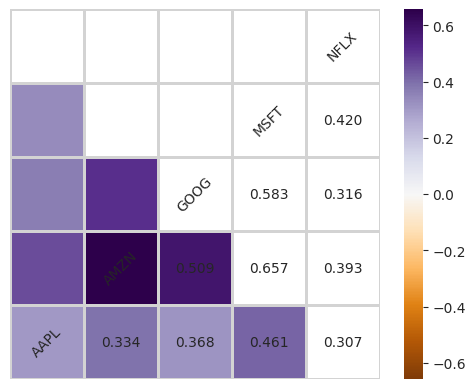

In [93]:
corr = rets_compr.corr()
print(corr)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)  # Replace np.bool with bool
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)

# Add annotations
for i in range(len(corr)):
    ax.text(i + 0.5, len(corr) - (i + 0.5), corr.columns[i],
            ha="center", va="center", rotation=45)
    for j in range(i + 1, len(corr)):
        s = "{:.3f}".format(corr.values[i, j])
        ax.text(j + 0.5, len(corr) - (i + 0.5), s,
                ha="center", va="center")

# Hide axis
ax.axis("off")
plt.show()


From the correlation heatmap, it becomes clear that Microsoft and Amazon share a stronger correlation, and in general
Microsoft maintains a strongest pairwise aggregate correlations compared to the rest of the 'FAANG' companies. Though perhaps expected, it is noteworthy that all five companies pairwise have moderate to strong positive correlation.

## Determining Value from Risk vs. Expected Return
Now we address the question of risk in buying stocks to compare these five companies.

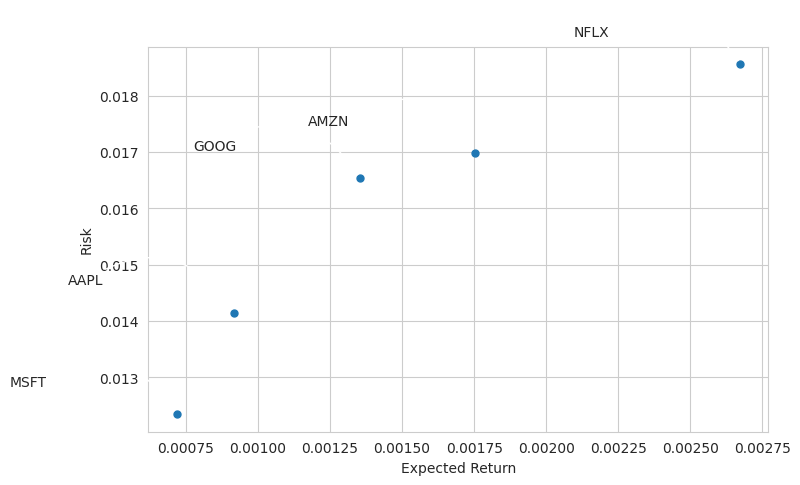

In [94]:
rets_filled = rets_compr.dropna()
plt.figure(figsize=(8,5))

plt.scatter(rets_filled.mean(),rets_filled.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label,x,y in zip(rets_filled.columns,rets_filled.mean(),rets_filled.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-120,20),
    textcoords = 'offset points',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))

From this plot we can see that Microsoft has the highest expected return and the lowest risk -- a sign that it is the best stock to buy at the moment. With its overhaul of its cloud computing sectors and high-profile acquisitions, Microsoft stock is a clear winner here. Netflix's performance is more concerning as it has virtually zero positive expected return along with the highest risk.

We want to model an additional value-at-risk metric in order to assess the value at each risk confidence interval for these 5 companies. Let's try this two ways: bootstrapping and using Monte Carlo-GBM, with Google.

In [95]:
rets_compr.head()

Ticker,AAPL,AMZN,GOOG,MSFT,NFLX
Date,,,,,
2023-11-13 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2023-11-14 00:00:00+00:00,0.014286,0.022512,0.013394,0.009791,0.009064
2023-11-15 00:00:00+00:00,0.003041,-0.017833,0.007015,0.000406,0.029622
2023-11-16 00:00:00+00:00,0.009042,-0.002584,0.017011,0.017583,0.010846
2023-11-17 00:00:00+00:00,-0.000105,0.016453,-0.012689,-0.016801,-0.002227


In [96]:
rets_compr['GOOG'].quantile(q=0.05)


-0.023493528185391133

In [97]:
rets_compr['GOOG'].quantile(q=0.01)



-0.045536413998064

From the empirical quantiles given for both confience intervals, we know that the worst possible loss will not exceed 2.65 percent with 95% confidence and 5.04 percent with 99% confidence.

## Predicting Future Risk and Value of Stocks
We run the Monte Carlo Method on the GBM model to assess the stability and predict the future risk of our stocks. For this component, I'll be analyzing Google's stock.

In [98]:
days = 365

#delta t
dt = 1/365

mu = rets_compr.mean()['GOOG']

sigma = rets_compr.std()['GOOG']


def stock_monte_carlo(start_price,days,mu,sigma):

    price = np.zeros(days)
    price[0] = start_price

    shock = np.zeros(days)
    drift = np.zeros(days)

    for x in range(1,days):

        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))

        drift[x] = mu * dt

        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))

    return price

We’re going to run 100 Monte Carlo simulations of Google stocks. Here's the stock's opening values again.



In [99]:
GOOG.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2023-11-13 00:00:00+00:00,133.312607,133.639999,134.110001,132.770004,133.360001,16409900
2023-11-14 00:00:00+00:00,135.098221,135.429993,137.240005,135.100006,135.649994,22317300
2023-11-15 00:00:00+00:00,136.045898,136.380005,136.839996,135.330002,136.639999,15840900
2023-11-16 00:00:00+00:00,138.360214,138.699997,138.880005,136.080002,136.960007,17615100
2023-11-17 00:00:00+00:00,136.604523,136.940002,138.000000,135.479996,137.820007,25565300


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

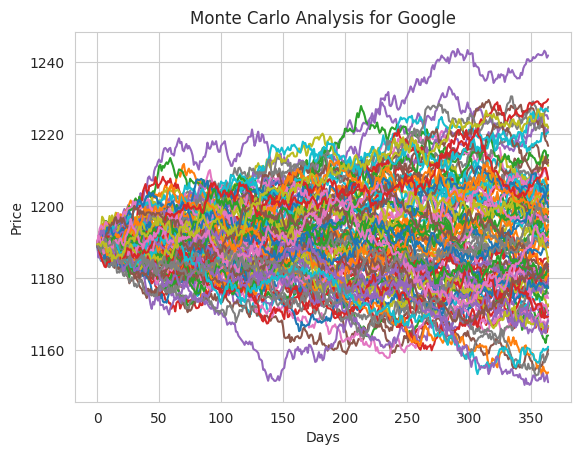

In [100]:
start_price = 1189.39 #Taken from above

for run in range(1,100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

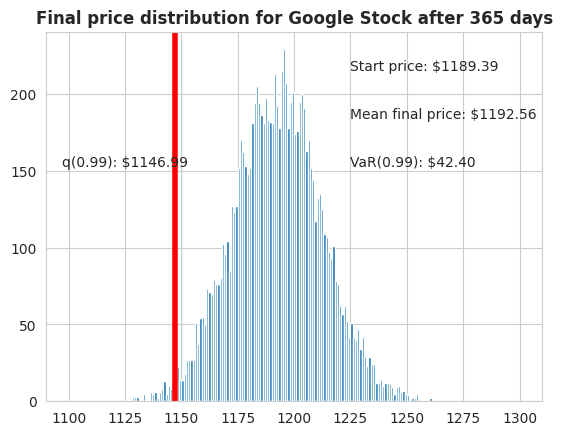

In [101]:
runs = 10000

simulations = np.zeros(runs)

for run in range(1,runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200,range = [1100,1300])

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" %days, weight='bold')

Based off the histogram, we conclude that Google's stock price is very stable (only a $0.11 difference between start and mean final price). The value-at-risk of our investment is $46.42 for maximum low price of $1142.97 with 99% confidence, which is approximately a 3.9% risk compared to the 6.5% we achieved via bootstrapping.